In [5]:
import numpy as np


class Perceptron:
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    b_ : Scalar
      Bias unit after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                #compute the update
                update = self.eta * (target - self.predict(xi))
                #update the weights
                self.w_ += update * xi
                #update the bias
                self.b_ += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)

In [6]:
import os
import pandas as pd

try:
    s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
    print('From URL:', s)
    df = pd.read_csv(s,
                     header=None,
                     encoding='utf-8')
    
except HTTPError:
    s = 'iris.data'
    print('From local Iris path:', s)
    df = pd.read_csv(s,
                     header=None,
                     encoding='utf-8')
    
df.tail()

From URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


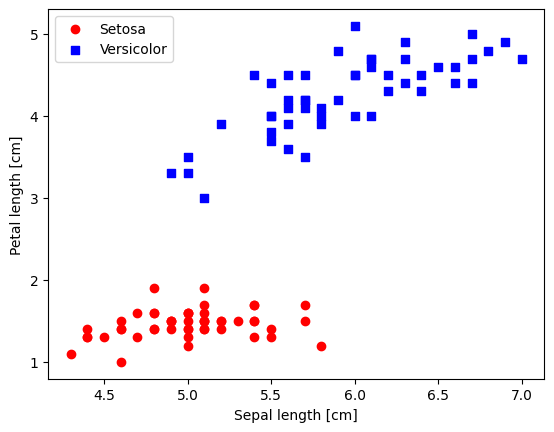

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='s', label='Versicolor')

plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')

# plt.savefig('images/02_06.png', dpi=300)
plt.show()

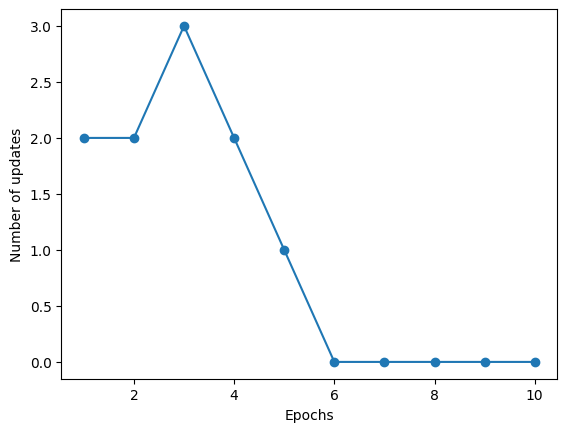

In [8]:
ppn = Perceptron(eta=0.1, n_iter=10)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

plt.show()

In [9]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')

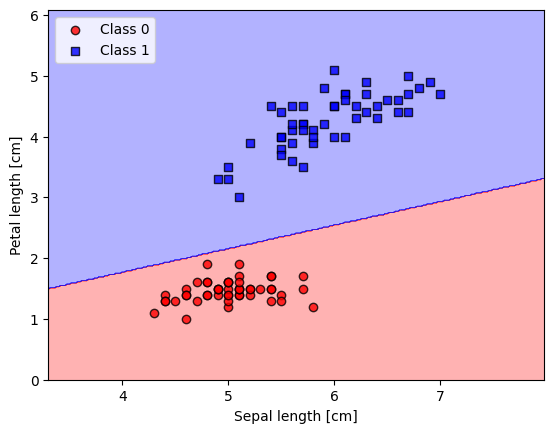

In [10]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')


plt.show()

In [11]:
class AdalineGD(Perceptron):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    b_ : Scalar
      Bias unit after fitting.
    losses_ : list
      Mean squared eror loss function values in each epoch.

    """
    

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        self.losses_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            errors = (y - net_input)
            self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * 2.0 * errors.mean()
            loss = (errors**2).mean()
            self.losses_.append(loss)
        return self

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.5, 1, 0)
    


Text(0.5, 1.0, 'Adaline - Learning rate 0.0001')

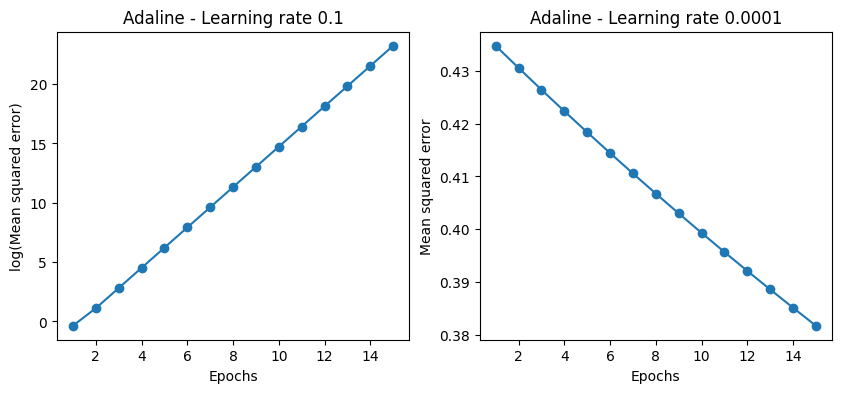

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = AdalineGD(n_iter=15, eta=0.1).fit(X, y)
ax[0].plot(range(1, len(ada1.losses_) + 1), np.log10(ada1.losses_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Mean squared error)')
ax[0].set_title('Adaline - Learning rate 0.1')

ada2 = AdalineGD(n_iter=15, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.losses_) + 1), ada2.losses_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Mean squared error')
ax[1].set_title('Adaline - Learning rate 0.0001')

In [13]:
# standardize features
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

(-7.0, 7.0)

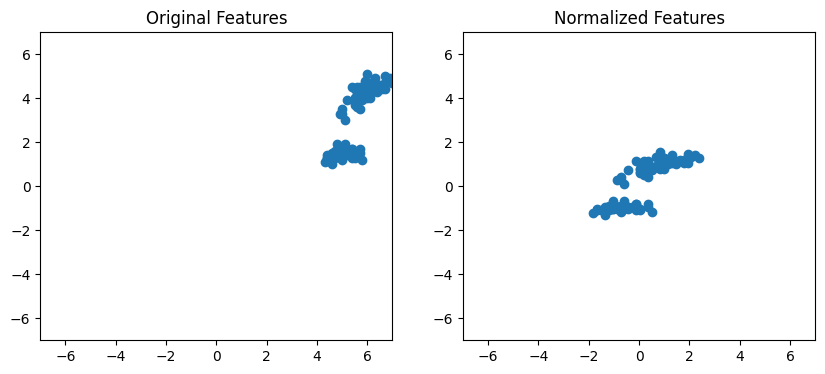

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ax[0].scatter(X[:, 0], X[:, 1])
ax[0].set_title('Original Features')
ax[1].scatter(X_std[:, 0], X_std[:, 1])
ax[1].set_title('Normalized Features')
#make both plots have the same scale
max_val = 7
ax[0].set_xlim(-max_val, max_val)
ax[0].set_ylim(-max_val, max_val)
ax[1].set_xlim(-max_val, max_val)
ax[1].set_ylim(-max_val, max_val)

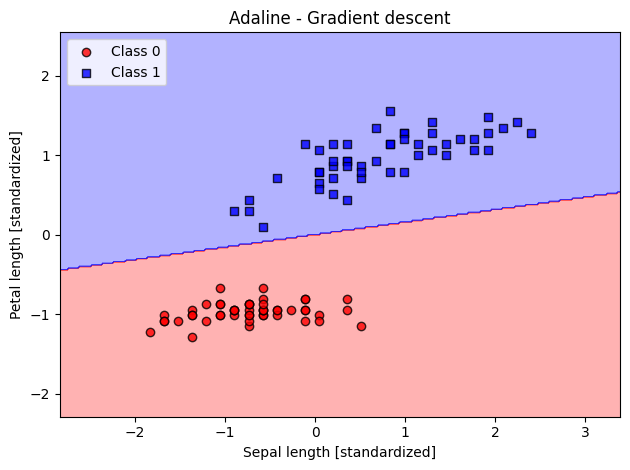

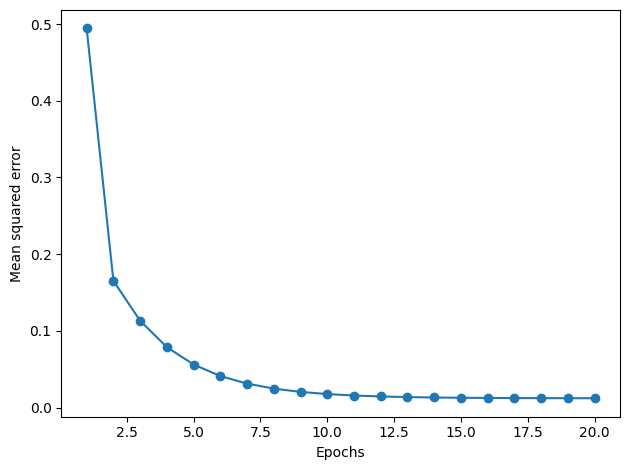

In [15]:
ada_gd = AdalineGD(n_iter=20, eta=0.5)
ada_gd.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada_gd)
plt.title('Adaline - Gradient descent')
plt.xlabel('Sepal length [standardized]')
plt.ylabel('Petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/02_14_1.png', dpi=300)
plt.show()

plt.plot(range(1, len(ada_gd.losses_) + 1), ada_gd.losses_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Mean squared error')

plt.tight_layout()
#plt.savefig('images/02_14_2.png', dpi=300)
plt.show()

In [25]:
import torch
import torch.nn as nn
import torch.optim as optim

class AdaptiveLinearModel(nn.Module):
    def __init__(self, input_dim):
        super(AdaptiveLinearModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)  # Single linear layer

    def forward(self, x):
        return self.linear(x)

    def fit(self, X, y, epochs=100, learning_rate=0.01):
        """
        Fit training data.

        Parameters
        ----------
        X : array-like, shape = [n_examples, n_features]
            Training vectors.
        y : array-like, shape = [n_examples]
            Target values.
        epochs : int, optional (default=100)
            Number of passes over the training data.
        learning_rate : float, optional (default=0.01)
            Learning rate for weight updates.
        """
        # Convert input data to PyTorch tensors
        X_tensor = torch.tensor(X, dtype=torch.float32)
        y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

        # Define loss function and optimizer
        criterion = nn.MSELoss()
        optimizer = optim.SGD(self.parameters(), lr=learning_rate)

        # Training loop
        for epoch in range(epochs):
            # Forward pass: compute predicted y
            y_pred = self.forward(X_tensor)

            # Compute and print loss
            loss = criterion(y_pred, y_tensor)

            # Zero gradients, perform backward pass, and update weights
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Print loss every 10 epochs
            if (epoch+1) % 10 == 0:
                print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')
        return y_pred.detach().numpy()
    
    def predict(self, X):
        """
        Predict class labels for samples in X.

        Parameters
        ----------
        X : array-like, shape = [n_examples, n_features]
            Samples.

        Returns
        -------
        array-like, shape = [n_examples]
            Predicted class labels.
        """
        # Convert input data to PyTorch tensor
        X_tensor = torch.tensor(X, dtype=torch.float32)

        # Forward pass: compute predicted y
        y_pred = self.forward(X_tensor)

        # Convert predictions to numpy array and apply step function
        return np.where(y_pred.detach().numpy() >= 0.5, 1, 0)

Epoch [10/20], Loss: 0.0192
Epoch [20/20], Loss: 0.0123


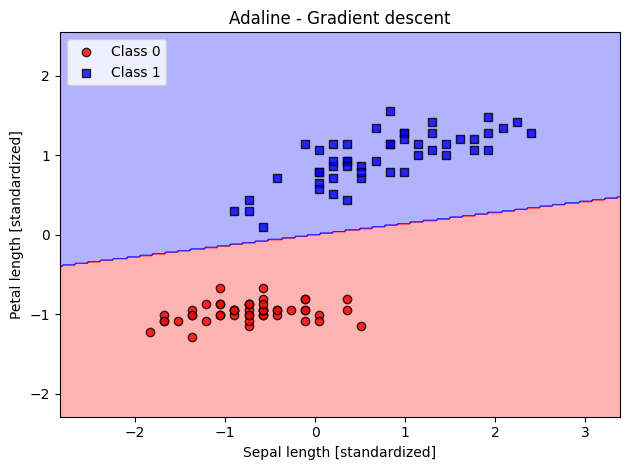

In [29]:
ada_pytorch = AdaptiveLinearModel(X.shape[1])
y_pred = ada_pytorch.fit(X_std, y, epochs=20, learning_rate=0.5)


plot_decision_regions(X_std, y, classifier=ada_pytorch)
plt.title('Adaline - Pytorch')
plt.xlabel('Sepal length [standardized]')
plt.ylabel('Petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


In [34]:
# Create a train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.8, random_state=1)

Epoch [10/20], Loss: 1.9420
Epoch [20/20], Loss: 6.6417


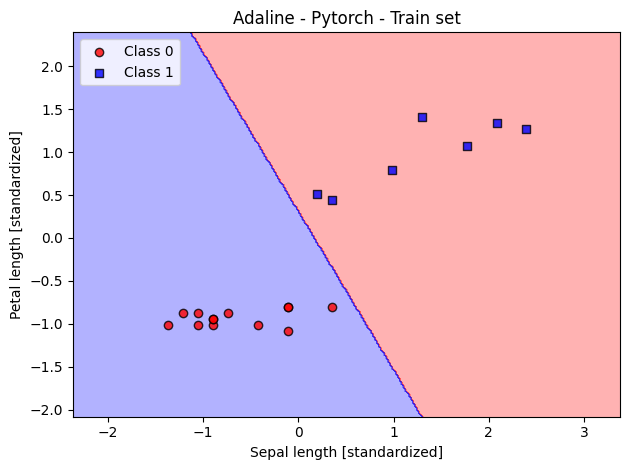

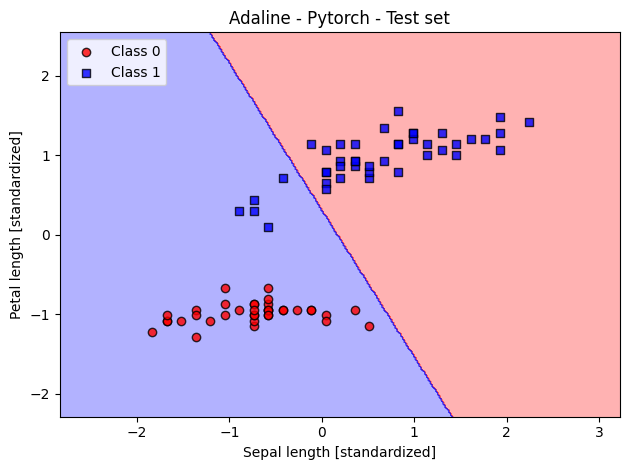

In [36]:
ada_pytorch = AdaptiveLinearModel(X.shape[1])
y_pred = ada_pytorch.fit(X_train, y_train, epochs=20, learning_rate=0.5)


plot_decision_regions(X_train, y_train, classifier=ada_pytorch)
plt.title('Adaline - Pytorch - Train set')
plt.xlabel('Sepal length [standardized]')
plt.ylabel('Petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plot_decision_regions(X_test, y_test, classifier=ada_pytorch)
plt.title('Adaline - Pytorch - Test set')
plt.xlabel('Sepal length [standardized]')
plt.ylabel('Petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


In [37]:
print('Size of train set:', X_train.shape[0])
print('Size of test set:', X_test.shape[0])

Size of train set: 20
Size of test set: 80


In [44]:
class OurFirstFeedForwardNeuralNetwork(AdaptiveLinearModel):
    def __init__(self, input_size, hidden_sizes = [8, 8, 8], output_size = 1):
        super(OurFirstFeedForwardNeuralNetwork, self).__init__(input_size)
        layers = []
        in_size = input_size
        for h_size in hidden_sizes:
            layers.append(nn.Linear(in_size, h_size))
            layers.append(nn.ReLU())
            in_size = h_size
        layers.append(nn.Linear(in_size, output_size))
        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)


Epoch [10/20], Loss: 0.2488
Epoch [20/20], Loss: 0.2321


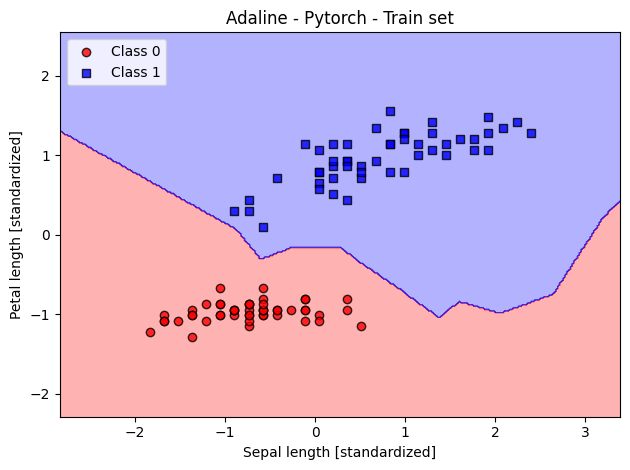

In [49]:
first_nn = OurFirstFeedForwardNeuralNetwork(X.shape[1])
y_pred = first_nn.fit(X_std, y, epochs=20, learning_rate=0.05)


plot_decision_regions(X_std, y, classifier=first_nn)
plt.title('Adaline - Pytorch - Train set')
plt.xlabel('Sepal length [standardized]')
plt.ylabel('Petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

Epoch [10/200], Loss: 0.2656
Epoch [20/200], Loss: 0.2654
Epoch [30/200], Loss: 0.2653
Epoch [40/200], Loss: 0.2651
Epoch [50/200], Loss: 0.2650
Epoch [60/200], Loss: 0.2648
Epoch [70/200], Loss: 0.2647
Epoch [80/200], Loss: 0.2645
Epoch [90/200], Loss: 0.2644
Epoch [100/200], Loss: 0.2642
Epoch [110/200], Loss: 0.2641
Epoch [120/200], Loss: 0.2639
Epoch [130/200], Loss: 0.2638
Epoch [140/200], Loss: 0.2637
Epoch [150/200], Loss: 0.2635
Epoch [160/200], Loss: 0.2634
Epoch [170/200], Loss: 0.2632
Epoch [180/200], Loss: 0.2631
Epoch [190/200], Loss: 0.2629
Epoch [200/200], Loss: 0.2628


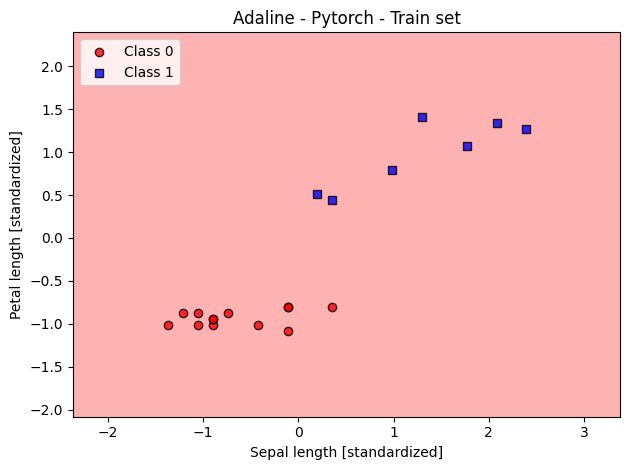

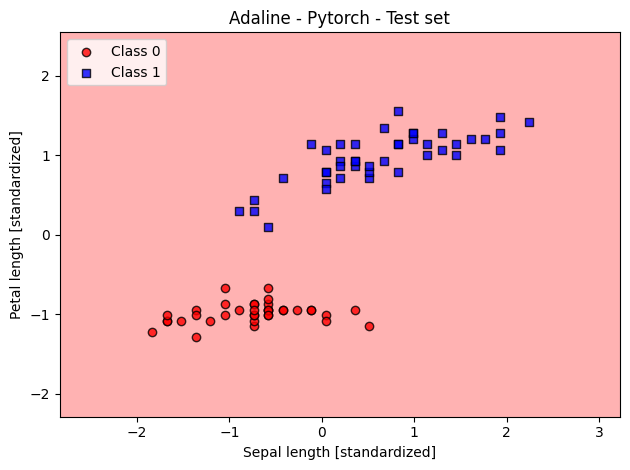

In [55]:
first_nn = OurFirstFeedForwardNeuralNetwork(X.shape[1])
y_pred = first_nn.fit(X_train, y_train, epochs=200, learning_rate=0.0001)


plot_decision_regions(X_train, y_train, classifier=first_nn)
plt.title('Adaline - Pytorch - Train set')
plt.xlabel('Sepal length [standardized]')
plt.ylabel('Petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plot_decision_regions(X_test, y_test, classifier=first_nn)
plt.title('Adaline - Pytorch - Test set')
plt.xlabel('Sepal length [standardized]')
plt.ylabel('Petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()